<a href="https://colab.research.google.com/github/moraleseconomia/CodeR/blob/master/UNI_Tarea_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

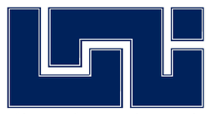

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

~~~Python
Morales León, Deybi Morales
~~~

# **Tarea Modelos Supervisados**

## *Modelo de Regresión Lineal Log-Log con Python*

1.   Calcular la Elasticidad del Gasto Personal de Bienes Duraderos (vehículos automotores y refacciones, muebles y equipo doméstico).
2.   Utilización de Regresión Lineal: Simple y Múltiple





## Insumos:
1. Python con Módulos.

2. Base de datos:

Es información monetaria de los gastos de consumo personal. Se publica de forma trimestral en los Estados Unidos en [The Economic Report of the President](https://www.govinfo.gov/app/collection/erp/2007). Para este ejercicio de la UNI hemos rescatado el excel **Table B-11: Real personal consumption expenditures, 2002-2020**. Contiene cifras monetarias anuales en miles de millones de dólares (2012) desde 1969 hasta 2019. La hemos guardado en archivo csv para su fácil acceso desde Github.

**Variables que contiene:**

**GCBD**:     Gastos en bienes duraderos. Los bienes duraderos son vehículos automotores y refacciones, muebles y equipo doméstico.

**GCBN**:    Gastos en bienes no duraderos. Los bienes perecederos son comida, ropa, gasolina, aceite, combustible de petróleo y carbón mineral.

**SERVICIOS**:  Gastos en servicios. Los servicios son vivienda, electricidad y gas, transporte y atención médica

La suma de estas cifras no totalizan los Gastos de Consumo Personal porque existen otros gastos que no se reportan en la base de datos al momento de desglozar los bienes y servicios que se consumen. Pueden ser las más importantes para las decisiones de política economica de los Estados Unidos.


## **Explicación del Modelo**

La **Regresión Lineal** no solo se utiliza para pronosticar, sino también es una poderosa herramienta para medir el impacto que provocan los cambios de las variables independientes (X) sobre la variable dependiente (y).

Cuando se realiza una regresión de las compras monetarias de productos o servicios versus el ingreso o gasto de las personas, según Economía, los coeficientes obtenidos son **elasticidades**. Para que lo coeficientes sea interpretables como elasticidades se debe primeramente aplicar logaritmo a las variables antes de correr el modelo de regresión.


## **¿Qué es elasticidad?**

*La **elasticidad** es la sensibilidad de variación que presenta una variable a los cambios experimentados por otra.* 

## **Modelo de elasticidad**

Las elasticidades se obtienen de:

$$Y_{i} = \beta_{1}X_{i}^{\beta_{2}}e_{u_{i}}$$

Esta ecuación se puede expresar como la fórmula de regresión simple:

$$lnY_{i} = ln\beta_{1} + \beta_{2}lnX_{i} + u_{i}$$

Esto se vuelve más familiar modificando la fórmula a lo siguiente:

$$lnY_{i} = \alpha + \beta_{2}lnX_{i} + u_{i}$$

La fórmula se conoce en teoría como modelo de regresión *log-log*, *doble-log* o *log-lineales*. 

Para que Python lo resuelva únicamente debemos transformar todas las variables a logaritmo natural. Se resuelve como una ecuación lineal con $Y$ y $X$ ya transformados:

$$Y_{i}^{*} = \alpha + \beta_{2}X_{i}^{*} + u_{i}$$

Los coeficientes resultantes $\alpha$ (intercepto) y $\beta$ (pendiente) serán las elasticidades.

## Importación de módulos de Python, revisión de la data, transformación de la data y demostración gráfica

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') 
import seaborn as sns
import pylab
import scipy.stats as stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Conjunto de datos

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/moraleseconomia/Modulo2_uni/main/Consumo_personal_BIENES_SERVICIOS.csv") # DataFrame

In [ ]:
df.head()

,Unnamed: 0,GCP,GCBD,GCBND,SERVICIOS
0,1969,603.6,90.5,214.2,299.0
1,1970,646.7,90.0,228.8,327.9
2,1971,699.9,102.4,239.7,357.8
3,1972,768.2,116.4,257.4,394.3
4,1973,849.6,130.5,286.1,432.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  51 non-null     int64  
 1   GCP         51 non-null     float64
 2   GCBD        51 non-null     float64
 3   GCBND       51 non-null     float64
 4   SERVICIOS   51 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [ ]:
# Eliminar columna de años.
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
df.head()

,GCP,GCBD,GCBND,SERVICIOS
0,603.6,90.5,214.2,299.0
1,646.7,90.0,228.8,327.9
2,699.9,102.4,239.7,357.8
3,768.2,116.4,257.4,394.3
4,849.6,130.5,286.1,432.9


In [ ]:
# Realizando correlación de variables
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')

In [ ]:
corr_matrix

,GCP,GCBD,GCBND,SERVICIOS
GCP,1.000000,0.986969,0.997887,0.999505
GCBD,0.986969,1.000000,0.985384,0.982423
GCBND,0.997887,0.985384,1.000000,0.996091
SERVICIOS,0.999505,0.982423,0.996091,1.000000


In [ ]:
corr_matrix.style.background_gradient(cmap='magma')#.set_precision(2)

,GCP,GCBD,GCBND,SERVICIOS
GCP,1.000000,0.986969,0.997887,0.999505
GCBD,0.986969,1.000000,0.985384,0.982423
GCBND,0.997887,0.985384,1.000000,0.996091
SERVICIOS,0.999505,0.982423,0.996091,1.000000


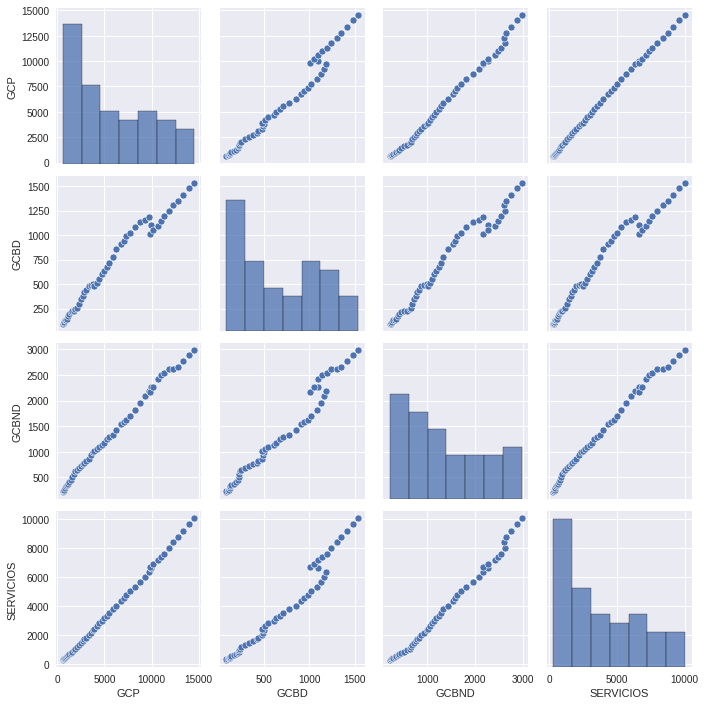

In [ ]:
sns.pairplot(df)

Según los histogramas de pairplot todas las variables parecen tener una distribución normal.

In [ ]:
# Aplicando pruebas para verificar cada una:
from scipy.stats import shapiro
estadistico, p_value = shapiro(df['GCP'])
print('GCP', 'Estadístico=%.3f, p value=%.3f' % (estadistico, p_value))
estadistico, p_value = shapiro(df['GCBD'])
print('GCBD', 'Estadístico=%.3f, p value=%.3f' % (estadistico, p_value))
estadistico, p_value = shapiro(df['GCBND'])
print('GCBND', 'Estadístico=%.3f, p value=%.3f' % (estadistico, p_value))
estadistico, p_value = shapiro(df['SERVICIOS'])
print('SERVICIOS', 'Estadístico=%.3f, p value=%.3f' % (estadistico, p_value))

GCP Estadístico=0.917, p value=0.002
GCBD Estadístico=0.925, p value=0.003
GCBND Estadístico=0.924, p value=0.003
SERVICIOS Estadístico=0.909, p value=0.001


El test de Shapiro dice que no existe distribución normal en las variables. Para distribución normal debería ser mayor a 0.05.

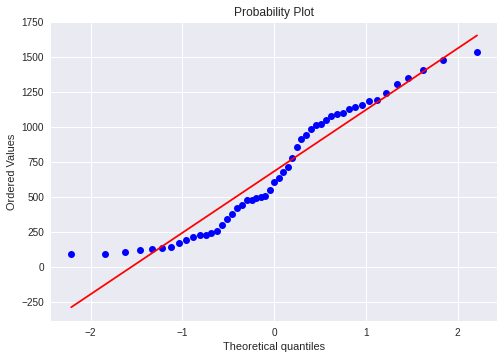

In [ ]:
# Verificando con qq-plot
stats.probplot(df['GCBD'], dist='norm', plot=pylab)
pylab.show()

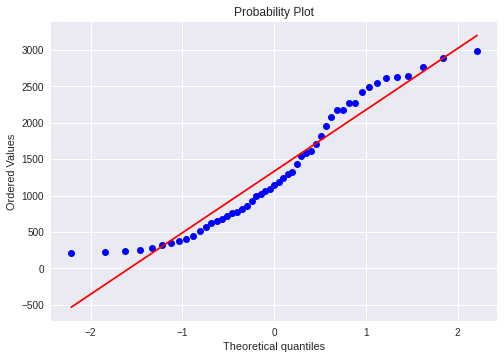

In [ ]:
# Verificando con qq-plot
stats.probplot(df['GCBND'], dist='norm', plot=pylab)
pylab.show()

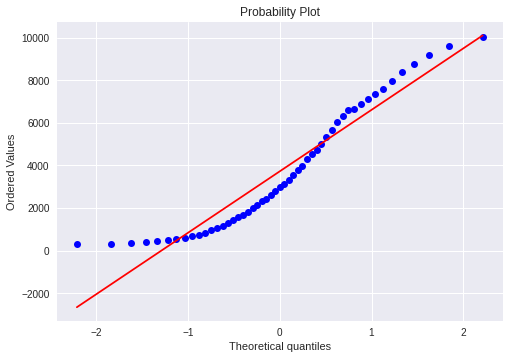

In [ ]:
# Verificando con qq-plot
stats.probplot(df['SERVICIOS'], dist='norm', plot=pylab)
pylab.show()

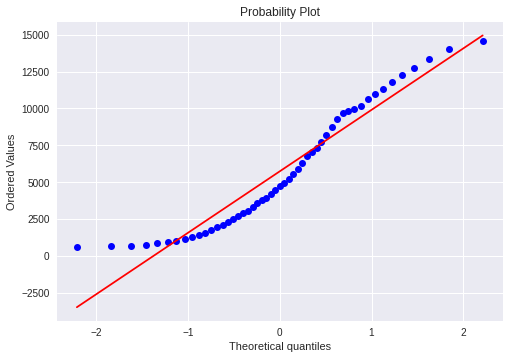

In [ ]:
# Verificando con qq-plot
stats.probplot(df['GCP'], dist='norm', plot=pylab)
pylab.show()

## Modelo 1: Elasticidad del Gasto en Servicios Financieros

$$GCBD_{i} = \alpha + \beta GCP_{i} $$ 

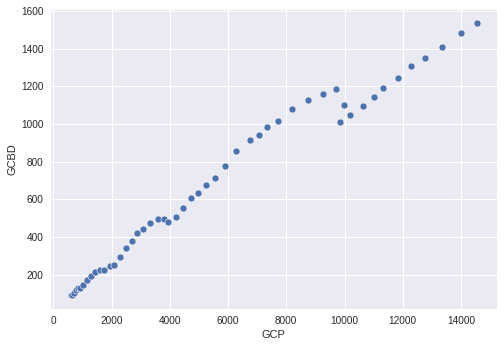

In [ ]:
# Verificando relación lineal
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="GCP", y="GCBD",
data=df)
plt.show()


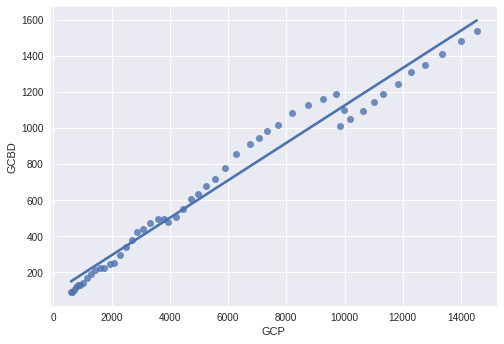

In [ ]:
sns.regplot(x="GCP", y="GCBD",
data=df,
ci=None)
plt.show()


La Linea de regresión no se ajusta a los puntos.

In [ ]:
# Haciendo transfomación porque se prefiere obtener logaritmo.
df['lnGCP'] = np.log(df['GCP'])
df['lnGCBD'] = np.log(df['GCBD'])


$$lnY_{t} = \alpha + \beta_{2}lnX_{i} + u_{t}$$

In [ ]:
df.head()

,GCP,GCBD,GCBND,SERVICIOS,lnGCP,lnGCBD
0,603.6,90.5,214.2,299.0,6.402912,4.505350
1,646.7,90.0,228.8,327.9,6.471883,4.499810
2,699.9,102.4,239.7,357.8,6.550937,4.628887
3,768.2,116.4,257.4,394.3,6.644050,4.757033
4,849.6,130.5,286.1,432.9,6.744766,4.871373


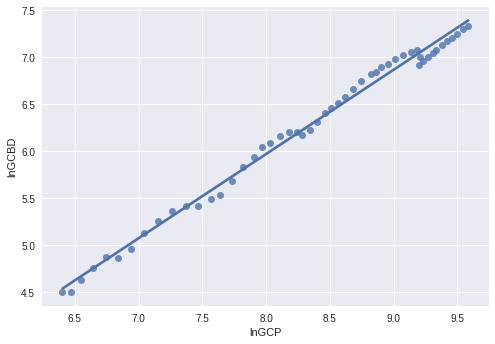

In [ ]:
# Graficando la linea de regresión:
sns.regplot(x="lnGCP", y="lnGCBD",
data=df,
ci=None)
plt.show()


Regresión:

In [ ]:
from statsmodels.formula.api import ols

mdl_modelo1 = ols('lnGCBD ~ lnGCP', data=df).fit()

print(mdl_modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnGCBD   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6342.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.70e-53
Time:                        17:31:44   Log-Likelihood:                 60.372
No. Observations:                  51   AIC:                            -116.7
Df Residuals:                      49   BIC:                            -112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2011      0.094    -12.781      0.0

Revisando con gráficas:

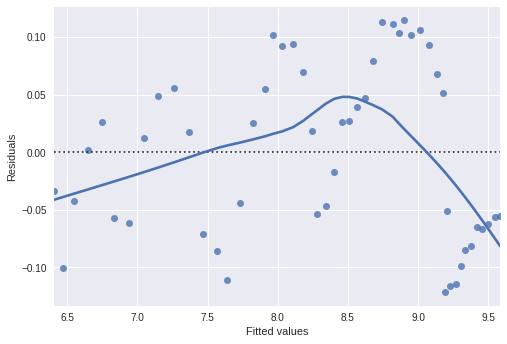

In [ ]:
# Residuals vs. fitted
sns.residplot(x="lnGCP", y="lnGCBD", data=df, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show();

Según la linea, los residuos no parecen estar distribuidos aleatoriamente.

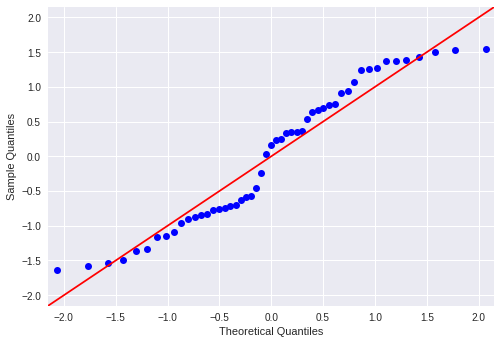

In [ ]:
# qq-plot
from statsmodels.api import qqplot
qqplot(data=mdl_modelo1.resid, fit=True, line="45");


Los residuos no están normalmente distribuidos. Deberían ser una linea recta. Si los residuos no siguen una distribución normal, los intervalos de confianza y los valores p pueden resultar inexactos.

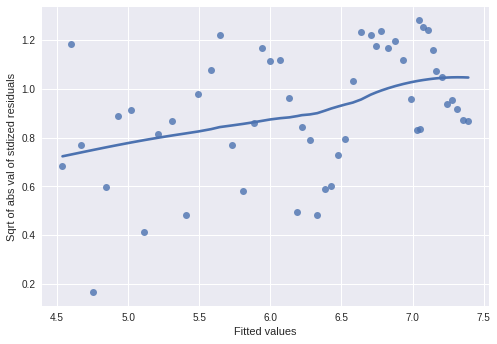

In [ ]:
# Scale-location plot
model_norm_residuals_fs = mdl_modelo1.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_fs = np.sqrt(np.abs(model_norm_residuals_fs))
sns.regplot(x=mdl_modelo1.fittedvalues,
            y=model_norm_residuals_abs_sqrt_fs,
            ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals");



Los residuos parecen presentar una tendencia positiva. No debería pasar.

Según las gráficas presentadas este modelo tiene problemas con los supuestos que se relacionan con la regresión lineal. Ya que son datos cortados cada año, el mayor problema con los supuestos puede deberse a que poseen orden del tiempo. Sin embargo, la meta no es pronósticar sino visualizar el impacto de las variables independientes sobre las dependientes, podemos leer el modelo como informativo pero teniendo nivel de precaución. 

## Métricas:

Error de test

In [ ]:
mse = mdl_modelo1.mse_resid
print('mse: ', mse)

mse:  0.005710687390249391


In [ ]:
rse = np.sqrt(mse)
print("rse: ", rse)

rse:  0.07556909017746205


In [ ]:
residuals_sq = mdl_modelo1.resid ** 2
resid_sum_of_sq = sum(residuals_sq)

n_obs = len(df3.index)
rmse = np.sqrt(resid_sum_of_sq/n_obs)

print("rmse: ", rmse)

rmse:  0.07407252436053177


* El $R^{2}$ es de 99.2%, lo cual es alto. Según esto la variación del Gasto Personal explica en un 99.2% el Consumo de Bienes Duraderos. Lo cual empíricamente es aceptable. Si aumenta el ingreso de las personas estás utilizaron sus nuevos niveles de ingresos para comprar nuevas piezas a su vehículos, comprar muebles, cocinas, televisores, celulares, etc. Buscaran satisfacer sus necesidades de largo plazo.

* Los p-values son significativos. Pero hay que tomarlo con discrección ya que los supuestos del modelo no están correctamente especificados. Quizás agregar la variable tiempo mejores los residuos pero como no se ha recibido la temática en el curso, no la tomaremos en cuenta para este ejercicio.

* La ecuación queda en $lnGCBD_{t} = -1.2011 + 0.8965lnGCP_{t}$

*  La elasticidad de GCBD respecto de GCP es de casi 0.90, lo que indica que si el gasto personal total aumenta 1%, en promedio, el gasto en servicio financiero se incrementará casi 0.90%. En consecuencia, el gasto en bienes duraderos (vehículo, cocina, muebles, televisores, etc) es sensible a los cambios en el gasto de consumo personal. Al ser positiva la pendiente, esto nos dice que si aumenta el gasto parte de ese aumento va a los gastos en bienes duraderos.

Vamos a ajustar el modelo, veremos si podemos elevar el $R^{2}$ agregando nuevas variables y fijandonos en no aumentar el Criterio de Información Akaike (AIC)

## Todas las variables

In [ ]:
df.head()

,GCP,GCBD,GCBND,SERVICIOS,lnGCP,lnGCBD
0,603.6,90.5,214.2,299.0,6.402912,4.505350
1,646.7,90.0,228.8,327.9,6.471883,4.499810
2,699.9,102.4,239.7,357.8,6.550937,4.628887
3,768.2,116.4,257.4,394.3,6.644050,4.757033
4,849.6,130.5,286.1,432.9,6.744766,4.871373


In [ ]:
# Haciendo transfomación porque se prefiere obtener logaritmo.
df['lnGCBND'] = np.log(df['GCBND'])
df['lnSERVICIOS'] = np.log(df['SERVICIOS'])
df3 = df[['lnGCP', 'lnGCBD', 'lnGCBND', 'lnSERVICIOS']]
df3.head()

,lnGCP,lnGCBD,lnGCBND,lnSERVICIOS
0,6.402912,4.505350,5.366910,5.700444
1,6.471883,4.499810,5.432848,5.792709
2,6.550937,4.628887,5.479388,5.879974
3,6.644050,4.757033,5.550631,5.977112
4,6.744766,4.871373,5.656341,6.070507


In [ ]:
mdl_modelo2 = ols('lnGCBD ~ lnGCP + lnGCBND + lnSERVICIOS', data=df3).fit()

print(mdl_modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                 lnGCBD   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5876.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.68e-60
Time:                        17:31:45   Log-Likelihood:                 87.375
No. Observations:                  51   AIC:                            -166.7
Df Residuals:                      47   BIC:                            -159.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -5.8602      0.787     -7.447      

* El $R^{2}$ es de 99.7, es un pequeño aumento respecto a solo una variable.

* El AIC baja considerablemente, de -116.7 a -166.7

* Los $p-values$ son significativos en las siguientes variables

* La lectura de las variables según sus coeficientes: 

 1. El gasto en Bienes Duraderos disminuye en 5.86% cuando no hay cambios en el resto de gastos personales y total.

 2. Si el gasto en Bienes No Duraderos (comida, ropa, gasolina, aceite, combustible de petróleo y carbón mineral) aumenta 1%, en promedio, el gasto en Bienes Duraderos disminuye en 2.02%. Se gasta en Bienes Duraderos o en Bienes No Duraderos.

 3. Si el gasto en Servicios aumenta 1%, en promedio, el gasto en Bienes Duraderos disminuye en 3.61%. Se gasta en Bienes Duraderos o Servicios.

 4. Al incluir todas la variables el impacto en el Consumo de Bienes Duraderos es mayor cuando varia el Gasto de Consumo Personal. Si el gasto en Consumo Personal aumenta 1%, en promedio, el gasto en Bienes Duraderos aumentas en 6.54%.

 Como evidencia confirmada por el modelo, si el gobierno aumenta los salarios, estos aumentarán el consumo de los Bienes Duraderos. Es algo que se nota cada fin de año cuando las personas ven aumentados sus ingresos por aguinaldos, bonos, etc. La mayor parte de esos ingresos van dirigido a reemplazar o comprar nuevos Bienes Duraderos (Vehículos, Autopartes, Muebles, etc).


# Revisando si todas la variables mejoran supuestos

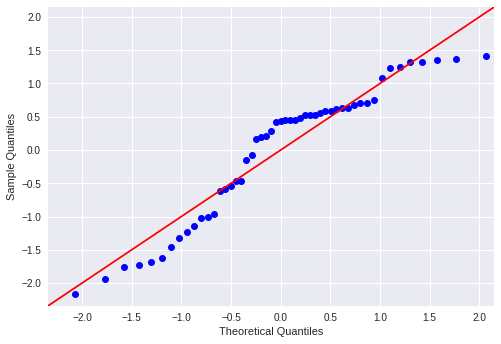

In [ ]:
# qq-plot
from statsmodels.api import qqplot
qqplot(data=mdl_modelo2.resid, fit=True, line="45");

In [ ]:
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [ ]:
X = df3.drop(["lnGCBD"], axis=1)
y = df3['lnGCBD']

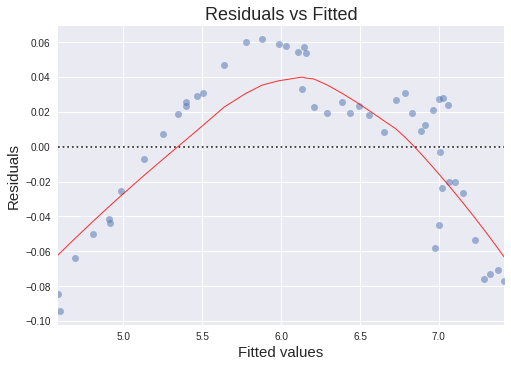

In [ ]:
# generate OLS model
#model = sm.OLS(y, sm.add_constant(X))
#model_fit = model.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)


# model values
model_fitted_y = mdl_modelo2.fittedvalues
# model residuals
model_residuals = mdl_modelo2.resid
# normalized residuals
model_norm_residuals = mdl_modelo2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = mdl_modelo2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = mdl_modelo2.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

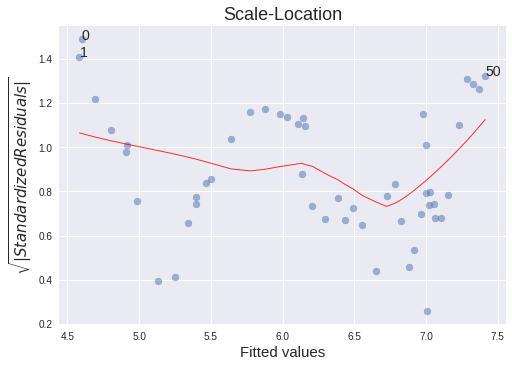

In [ ]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_sq_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                               xy=(model_fitted_y[i],
                                   model_norm_residuals_abs_sqrt[i]));


In [ ]:
mse = mdl_modelo2.mse_resid
print('mse: ', mse)

mse:  0.002064928021062693


In [ ]:
rse = np.sqrt(mse)
print("rse: ", rse)

rse:  0.04544147908093104


In [ ]:
residuals_sq = mdl_modelo2.resid ** 2
resid_sum_of_sq = sum(residuals_sq)

n_obs = len(df3.index)
rmse = np.sqrt(resid_sum_of_sq/n_obs)

print("rmse: ", rmse)

rmse:  0.043623077403546574


No mejora los supuestos con todas las variables disponibles. Sin embargo disminuye el RMSE.

Continúa siendo viable para medir impacto pero no para realizar pronóstico.

# **Conclusiones**


Se trató de obtener elasticidades utilizando el modelo de regresión lineal simple y múltiple. Al calcular las elasticidades del Gasto en Consumo Personal de Bienes Duraderos con las variables disponibles obtuvimos los siguientes hallazgos:

En Regresión Simple: 

 * La elasticidad de GCBD respecto de GCP es de casi 0.90, lo que indica que si el gasto personal total aumenta 1%, en promedio, el gasto en servicio financiero se incrementará casi 0.90%. En consecuencia, el gasto en bienes duraderos (vehículo, cocina, muebles, televisores, etc) es sensible a los cambios en el gasto de consumo personal. Al ser positiva la pendiente, esto nos dice que si aumenta el gasto parte de ese aumento va a los gastos en bienes duraderos.

En Regresión Múltiple:

 * Al incluir todas la variables el impacto en el Consumo de Bienes Duraderos es mayor cuando varia el Gasto de Consumo Personal. Si el gasto en Consumo Personal aumenta 1%, en promedio, el gasto en Bienes Duraderos aumentas en 6.54%.

Como evidencia confirmada por los modelos, si el gobierno aumenta los salarios, estos aumentarán el consumo de los Bienes Duraderos. Es algo que se nota cada fin de año cuando las personas ven aumentados sus ingresos por aguinaldos, bonos, etc. La mayor parte de esos ingresos van dirigido a reemplazar o comprar nuevos Bienes Duraderos (Vehículos, Autopartes, Muebles, etc). 


***Referencias:***

*Gujarati, D. N., & Porter, D. C. (2010). Econometría (5a.ed.--.). México: McGraw Hill.* Página 159.

*DataCamp: Introduction to Regression with statsmodels in Python*

*Datos: https://www.govinfo.gov/*